In [85]:
### Tensor flow

#string = tf.variable("This is string", tf.string)

#number = tf.Variable(324, tf.int16)

#floating = tf.Variable(3.567, tf.floating)

#rank1_tensor = tf.Variable(["Test"], tf.string) ###Because 1 list, 1 array.
#rank2_tensor = tf.Variable([["test","ok", ["test", "yes"]], tf.string)


#tf.rank(rank2_tensor)



### SHAPES PF TENSORS

#rank2_tensor.shape
#rank1_tensor.shape



###Changing shape

#tensor1 = tf.ones([1,2,3]) #tf.ones() creates a shape [1,2,3] tensor full of ones
#tensor2 = tf.reshape(tensor1, [2,3,1]) #reshape existing data to shape [2,3,1]
#tensor3 = tf.reshape(tensor2, (3, -1]) #-1 tells the tensor to calculate the size of the dimension in that place
#this will reshape the tensor[3,2]

# The number of elements in the reshaped tensor Must match the number in the original


#print(tensor1)
#print(tensor2)
#print(tensor3)



#Evaluating Tensors

#with tf.Session() as sess: #creates a session using the default graph
    #tensor.eval() 

In [86]:
#import tensorflow as tf

#tensor1 = tf.ones([1,2,3]) #tf.ones() creates a shape [1,2,3] tensor full of ones
#tensor2 = tf.reshape(tensor1, [2,3,1]) #reshape existing data to shape [2,3,1]
#tensor3 = tf.reshape(tensor2, ([3, -1]) #-1 tells the tensor to calculate the size of the dimension in that place
#this will reshape the tensor[3,2]

# The number of elements in the reshaped tensor Must match the number in the original


#print(tensor1)
#print(tensor2)
#print(tensor3)


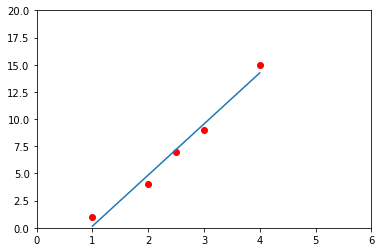

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]

plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

!pip install -q sklearn

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [8]:
# Load dataset.
dftrain = pd.read_csv('train.csv') # training data
dfeval = pd.read_csv('eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [9]:
print(dftrain.loc[0], y_train.loc[0])

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


In [10]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [11]:
dftrain.shape

(627, 9)

In [12]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

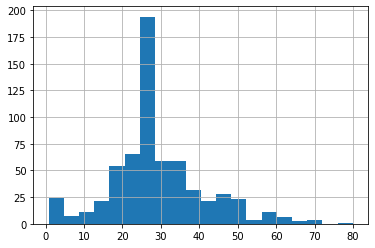

In [13]:
dftrain.age.hist(bins=20)
plt.show()

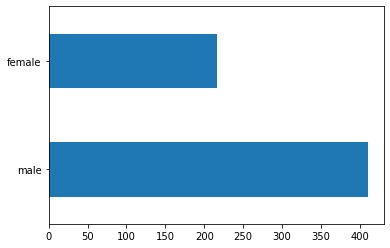

In [14]:
dftrain.sex.value_counts().plot(kind='barh')
plt.show()

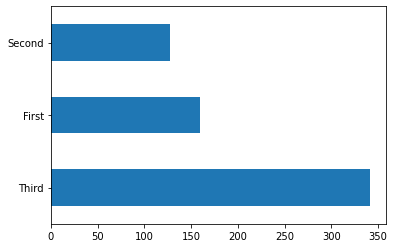

In [15]:
dftrain['class'].value_counts().plot(kind='barh')
plt.show()

Text(0.5, 0, '% Survived')

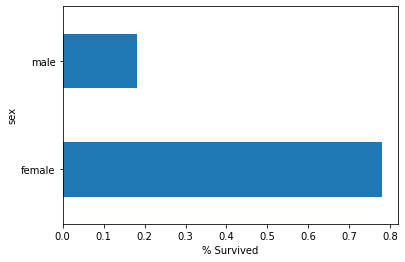

In [16]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% Survived')

In [17]:
dfeval = pd.read_csv('eval.csv')
#y_eval = dfeval.pop('survived')
#y_eval.head()

In [18]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [19]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [20]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\899A~1\\AppData\\Local\\Temp\\tmp78zfa941', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [21]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

print(result)

0.7462121
{'accuracy': 0.7462121, 'accuracy_baseline': 0.625, 'auc': 0.82509947, 'auc_precision_recall': 0.7692212, 'average_loss': 0.54184055, 'label/mean': 0.375, 'loss': 0.54021853, 'precision': 0.6269841, 'prediction/mean': 0.4965459, 'recall': 0.7979798, 'global_step': 200}


In [33]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[3])
print(y_eval.loc[3])
print(result[4]['probabilities'][1])    


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\899A~1\AppData\Local\Temp\tmp78zfa941\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
survived                        1
sex                        female
age                          55.0
n_siblings_spouses              0
parch                           0
fare                         16.0
class                      Second
deck                      unknown
embark_town           Southampton
alone                           y
Name: 3, dtype: object
1
0.42997628
